In [20]:
import statistics
import scipy as sp
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("Mental-Health-Twitter.parquet")

In [5]:
dfcleancopy = df["retweets"]

In [10]:
dfcleancopy = dfcleancopy.to_frame()

In [11]:
Sx = dfcleancopy.cov().values
Sx = sp.linalg.inv(Sx)

mean = dfcleancopy.mean().values

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)



0.009044603106064029


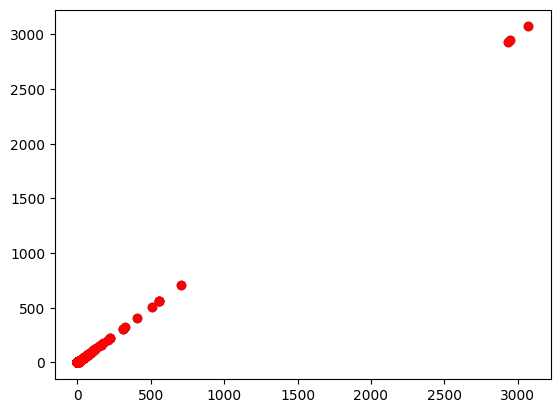

In [21]:
mR = mahalanobisR(dfcleancopy,mean,Sx)
per= np.percentile(mR,85)
print(per)
outliners=[]
for x in mR:
  if x>per:
    outliners.append(x)
len(outliners)
#0.00904460310606404 90
#0.008906751787061533 10


plt.plot(mR,mR, 'o')
plt.plot(outliners,outliners, 'or')

plt.show()

0.009044603106064029


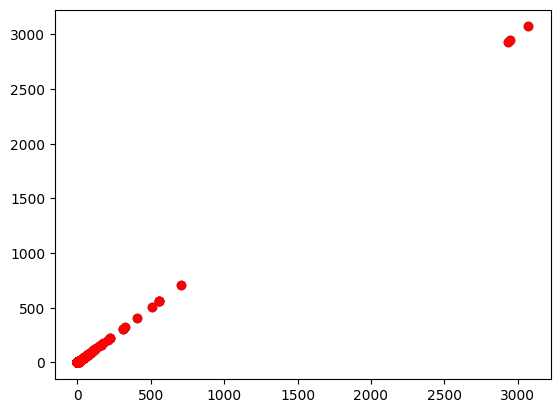

In [22]:
mR = mahalanobisR(dfcleancopy,mean,Sx)
per= np.percentile(mR,85)
print(per)
outliners=[]
for x in mR:
  if x>per:
    outliners.append(x)
len(outliners)
#0.00904460310606404 90
#0.008906751787061533 10


plt.plot(mR,mR, 'o')
plt.plot(outliners,outliners, 'or')

plt.show()

In [23]:
indexlist=[]

for i in mR:
  if i in outliners:
    indexlist.append(mR.index(i))
print(indexlist)

[979, 2543, 2737, 2739, 2744, 2746, 2750, 2754, 2772, 2777, 2780, 2794, 2800, 2802, 2807, 2809, 2811, 2847, 2848, 2859, 2863, 2878, 2879, 2880, 2882, 2883, 2885, 2888, 2891, 2909, 2910, 2912, 2913, 2914, 2915, 2916, 2925, 2928, 2929, 2930, 2936, 2938, 2945, 2950, 2951, 2952, 2953, 2958, 2959, 2960, 2966, 2967, 2970, 2972, 2973, 2979, 2980, 2984, 2987, 2989, 2999, 3000, 3001, 3003, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3026, 3027, 3028, 3030, 3032, 3038, 3039, 3040, 3042, 3045, 3056, 3057, 3058, 3078, 3082, 3087, 3089, 3090, 3096, 3097, 3099, 3103, 3128, 3129, 3132, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3150, 3151, 3154, 3161, 3162, 3169, 3180, 3181, 3211, 3213, 3214, 3220, 3221, 3222, 3227, 3228, 3229, 3231, 3232, 3243, 3245, 3247, 3251, 3255, 3256, 3275, 3276, 3277, 3278, 3280, 3281, 3286, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3296, 3300, 3301, 3303, 3304, 3305, 3314, 3315, 3325, 3326, 3327, 3355, 3356, 3362, 3367, 3368, 3369

979       3286
2543     11660
2737      6328
2739      7918
2744     10460
         ...  
17556    37566
17588    21193
17589     7631
17651     3137
17693    52249
Name: retweets, Length: 801, dtype: int64

In [34]:
dfcopy = df.copy()
dfcopy



,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [35]:
dfcopy.drop(dfcopy.index[indexlist], inplace=True)


,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [37]:
dfcopy.reset_index()


,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05afff6f-eed1-4617-8c5f-e922b7f4b15f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>